<a href="https://colab.research.google.com/github/kasa10/Digital_Team_Gazpromneft_MIPT/blob/main/interpolate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Explore**

В этой части мы выводим таблицу и информацию о структуре данных

In [14]:
import pandas as pd
pd.set_option('max_rows', 10) #Здесь можно настроить максимально возможную длинну столбца 


def explore_data():
    """ Make some visualizations and collect statistics about data in files """
    train = pd.read_csv('train.csv')
    #test = pd.read_csv('../data/test.csv')

    print(f'Размер train таблицы {train.shape}')
    #print(f'Размер test таблицы {test.shape}')

    print(f'Количество уникальных скважин в train таблице: {len(train["Номер скважины"].unique())}')
    #print(f'Количество уникальных скважин в test таблице: {len(test["Номер скважины"].unique())}')

    wells = list(train["Номер скважины"].unique())
    #print(wells) список
    well_df = train[train["Номер скважины"] == wells[0]]
    print(well_df)
    print(f'Размер таблицы с данными для одной скважины {well_df.shape}')


if __name__ == '__main__':
    explore_data()


Размер train таблицы (67136, 20)
Количество уникальных скважин в train таблице: 106
       datetime  Номер скважины  Дебит нефти  Давление забойное         x  \
0    1990-08-01               0    19.939000                NaN  18670.86   
1    1990-08-02               0    19.939000          39.064454  18670.86   
2    1990-08-03               0    21.172000          39.064487  18670.86   
3    1990-08-04               0    22.529000          38.965297  18670.86   
4    1990-08-05               0    22.529000          38.766822  18670.86   
..          ...             ...          ...                ...       ...   
615  1992-04-07               0     4.534759                NaN  18670.86   
616  1992-04-08               0     4.535000          51.641410  18670.86   
617  1992-04-09               0    14.877000          51.641410  18670.86   
618  1992-04-10               0    14.459000          51.641410  18670.86   
619  1992-04-11               0    15.434333          51.641413  1867

Здесь смотрим пропуски в данных

In [15]:
train = pd.read_csv('train.csv')
wells = list(train["Номер скважины"].unique())
well_df = train[train["Номер скважины"] == wells[0]]
print("Количество пропусков в данных (из 620): ")

for i in range(2, 20):
  print(f'{well_df.keys()[i]} {well_df[well_df.keys()[i]][0:-1].isnull().sum()}')

  

Количество пропусков в данных (из 620): 
Дебит нефти 0
Давление забойное 70
x 0
y 0
Объем жидкости 598
Объем нефти 598
Активная мощность (ТМ) 75
Время работы (ТМ) 75
Газовый фактор рабочий (ТМ) 330
Давление буферное 528
Давление забойное от Hд 3
Давление забойное от Pпр 166
Давление линейное (ТМ) 2
Давление на входе ЭЦН (ТМ) 47
Дебит газа (ТМ) 127
Дебит газа попутного 239
Дебит жидкости (ТМ) 132
Коэффициент мощности (ТМ) 69


Смотрим таблички

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
67131   NaN
67132   NaN
67133   NaN
67134   NaN
67135   NaN
Name: Газовый фактор рабочий (ТМ), Length: 67136, dtype: float64


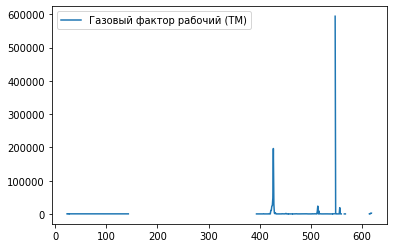

In [16]:
pd.set_option('max_rows', 1000)
%matplotlib inline

well_df = train[train["Номер скважины"] == wells[0]]
print(train['Газовый фактор рабочий (ТМ)'])

well_df.plot(y=['Газовый фактор рабочий (ТМ)'])

**Интерполяция данных и создание файла .csv**

In [18]:
#pd.set_option('max_rows', 1000)
from google.colab import files
%matplotlib inline

wells = list(train["Номер скважины"].unique())
well_df = train

train_int = train.interpolate()
train_int_int = train_int.interpolate(limit_direction ='backward')

print(train_int_int.isnull().sum())
print(train_int_int['Давление буферное'])

print(train_int_int)

train_int_int.to_csv('linear_interpolate_data.csv') 
files.download('linear_interpolate_data.csv')

datetime                       0
Номер скважины                 0
Дебит нефти                    0
Давление забойное              0
x                              0
y                              0
Объем жидкости                 0
Объем нефти                    0
Активная мощность (ТМ)         0
Время работы (ТМ)              0
Газовый фактор рабочий (ТМ)    0
Давление буферное              0
Давление забойное от Hд        0
Давление забойное от Pпр       0
Давление линейное (ТМ)         0
Давление на входе ЭЦН (ТМ)     0
Дебит газа (ТМ)                0
Дебит газа попутного           0
Дебит жидкости (ТМ)            0
Коэффициент мощности (ТМ)      0
dtype: int64
0        20.0
1        20.0
2        20.0
3        20.0
4        20.0
         ... 
67131    13.0
67132    13.0
67133    13.0
67134    13.0
67135    13.0
Name: Давление буферное, Length: 67136, dtype: float64
         datetime  Номер скважины  Дебит нефти  Давление забойное         x  \
0      1990-08-01               0      

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>